Build a regression model.


#### Let's take a look at the relationship between features with a heatmap


In [26]:
# Required libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [2]:
# Define the path to the CSV file
csv_file_path = 'joined.csv'

# Load the CSV data into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Creating heatmap data
df_heatmap = df[['usage', 'total_bikes', 'poi_distance']].copy()


In [3]:
# Define the features (X) and target (y)
X = df_heatmap[['total_bikes', 'poi_distance']]
y = df_heatmap['usage']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


Mean Squared Error: 0.08732279139263455
R-squared: 0.003010092085528271


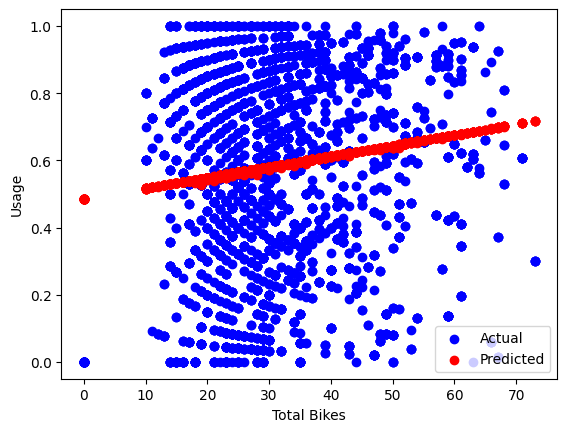

In [5]:
# Calculate mean squared error and R-squared (coefficient of determination)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize the regression line
plt.scatter(X_test['total_bikes'], y_test, color='blue', label='Actual')
plt.scatter(X_test['total_bikes'], y_pred, color='red', label='Predicted')
plt.xlabel('Total Bikes')
plt.ylabel('Usage')
plt.legend()
plt.show()


Based on the results:

The Mean Squared Error (MSE) is about 0.0873. MSE is a way to measure how close the predicted values are to the actual values. In simpler terms, a lower MSE is better. In this case, the model has an MSE of 0.0873, which means that, on average, the predictions are quite close to the real values.

The R-squared (R2) value is approximately 0.0030. R2 tells us how much of the variation in the "usage" (dependent variable) can be explained by the "total_bikes" and "poi_distance" (independent variables). When R2 is low, like in this case, it means that the model doesn't do a good job of explaining the differences in the data. This suggests that the linear regression model may not be the best fit for this dataset.

In summary, the linear regression model has a relatively low R-squared value, indicating that it might not be a strong predictor of the "usage" variable based on "total_bikes" and "poi_distance." To improve the predictions, exploration of other modeling techniques or consider using additional features in the analysis would be recommended.


In [6]:
# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model using MSE and R-squared
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R-squared:", r2_rf)


Random Forest Mean Squared Error: 0.10300731054058503
Random Forest R-squared: -0.1760646609269696


The results for the Random Forest Regression model are as follows:

Mean Squared Error (MSE): Approximately 0.1030
R-squared (R2): Approximately -0.1761
These results indicate that the Random Forest model did not perform better than the previous linear regression model. In fact, the R-squared value is negative, which suggests that the model is performing worse than a simple horizontal line that predicts the mean of the target variable.

Negative R-squared values can occur when the model fits the data poorly and performs worse than a horizontal line. It's possible that the features 'total_bikes' and 'poi_distance' may not be strong predictors of the 'usage' variable, or there may be other factors influencing the relationship.


In [29]:
# Load data 
df_joined = pd.read_csv('joined.csv', index_col=None)

# Creating heatmap data
df_heatmap = df_joined[['usage','total_bikes','poi_distance']].copy()


In [30]:
# Calculate 'usage_percentage'
df['usage_percentage'] = df['usage'] / df['total_bikes']

# Define thresholds and labels for classes
thresholds = [0, 0.2, 0.5, 1.0]
labels = ['Low Usage', 'Moderate Usage', 'High Usage']

# Create the new categorical target variable 'usage_category'
df['usage_category'] = pd.cut(df['usage_percentage'], bins=thresholds, labels=labels)

# Drop 'usage_percentage' if no longer need it
df.drop('usage_percentage', axis=1, inplace=True)


In [31]:
X = df[['total_bikes', 'poi_distance']]
y = df['usage_category']


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
classifier = LogisticRegression()


In [12]:
missing_values = df.isna().sum()
print(missing_values)


station             0
usage               0
total_bikes         0
poi_name            0
poi_distance        0
poi_address       154
usage_category    789
dtype: int64


In [13]:
df.dropna(inplace=True)


In [14]:
# Calculate 'usage_percentage'
df['usage_percentage'] = df['usage'] / df['total_bikes']


In [15]:
# Define thresholds and labels for classes
thresholds = [0, 0.3, 0.6, 1.0]  # Adjust the thresholds as needed
labels = ['Low Usage', 'Moderate Usage', 'High Usage']


In [16]:
# Create the new categorical target variable 'usage_category'
df['usage_category'] = pd.cut(df['usage_percentage'], bins=thresholds, labels=labels)


In [17]:
# Define thresholds and labels for classes
thresholds = [0, 0.3, 0.6, 1.0]  # Adjust the thresholds as needed
labels = ['Low Usage', 'Moderate Usage', 'High Usage']

# Create the new categorical target variable 'usage_category'
df['usage_category'] = pd.cut(df['usage_percentage'], bins=thresholds, labels=labels)


In [18]:
X = df[['total_bikes', 'poi_distance']]
y = df['usage_category']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
classifier = LogisticRegression()


In [21]:
df_joined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21724 entries, 0 to 21723
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station       21724 non-null  object 
 1   usage         21724 non-null  float64
 2   total_bikes   21724 non-null  int64  
 3   poi_name      21724 non-null  object 
 4   poi_distance  21724 non-null  float64
 5   poi_address   21570 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1018.4+ KB


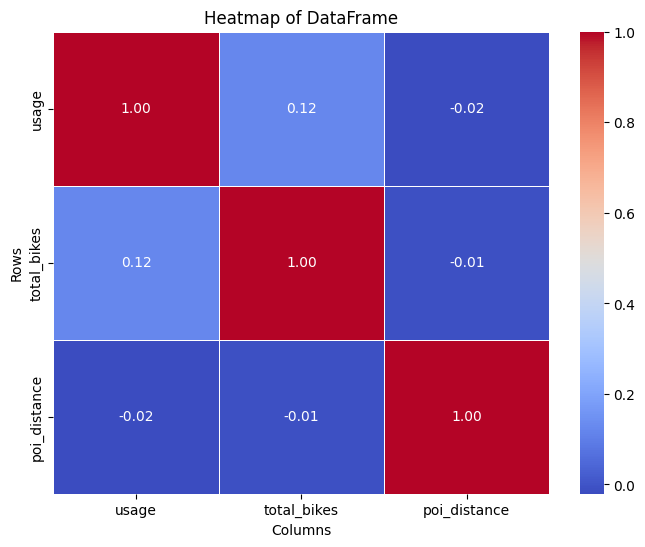

In [22]:
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))  # Set the figure size

# Create the correlation matrix
correlation_matrix = df_heatmap.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5)

# Add labels and title
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.title("Heatmap of DataFrame")

# Show the plot
plt.show()


In [23]:
X = df_joined[['usage', 'poi_distance']] 
y = df_joined['total_bikes']


Provide model output and an interpretation of the results.


In [28]:
# Assuming X and y are already defined
X = sm.add_constant(X)  # Adding a constant term to the predictors
est = sm.OLS(y, X).fit()  # Fitting an OLS model

# Now you can call summary on est
print(est.summary())



                            OLS Regression Results                            
Dep. Variable:            total_bikes   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     160.8
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           4.70e-70
Time:                        02:14:12   Log-Likelihood:                -85257.
No. Observations:               21724   AIC:                         1.705e+05
Df Residuals:                   21721   BIC:                         1.705e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           27.8375      0.183    152.146   

Dependent Variable (Dep. Variable): The dependent variable in the regression analysis is "total_bikes," which is the variable to predict.

R-squared (R-squared): The R-squared value measures the goodness of fit of the regression model. In the case, it's 0.015, which suggests that only about 1.5% of the variation in "total_bikes" can be explained by the variables "usage" and "poi_distance." This indicates that the model may not be a very good fit for the data.

Adj. R-squared (Adj. R-squared): This is the adjusted R-squared value, which takes into account the number of independent variables in the model. It's also 0.015 in the case.

F-statistic (F-statistic): The F-statistic tests whether there is a significant relationship between the independent variables (usage and poi_distance) and the dependent variable (total_bikes). A low p-value (close to 0) indicates that there is a significant relationship. In the case, the p-value is very close to 0, suggesting that at least one of the independent variables is significant.

Coefficients (coef): The coefficients represent the estimated effect of each independent variable on the dependent variable. In the case:

The intercept (const) is 27.8375.
The coefficient for "usage" is 4.9819, meaning that for a one-unit increase in "usage," "total_bikes" is expected to increase by approximately 4.98.
The coefficient for "poi_distance" is -1.594e-05, which is very close to zero. This suggests that "poi_distance" may not have a significant impact on "total_bikes" in the model.
Standard Errors (std err): These values indicate the standard errors of the coefficients. Lower standard errors suggest more precise coefficient estimates.

t-statistic (t): The t-statistic measures the significance of each coefficient. A higher absolute t-statistic value suggests greater significance. In the case, both "const" and "usage" have high t-statistic values, indicating their significance, while "poi_distance" has a lower t-statistic.

p-value (P>|t|): This value indicates the probability that the coefficient is not significant. A low p-value (typically < 0.05) indicates that the coefficient is significant. In the case, "const" and "usage" have very low p-values, while "poi_distance" has a higher p-value, suggesting it may not be significant.

Omnibus: The Omnibus test assesses the overall goodness of fit of the model. A low p-value suggests that the model may not fit the data well.

Durbin-Watson: The Durbin-Watson statistic tests for autocorrelation in the residuals. Values close to 2 suggest no significant autocorrelation.

Jarque-Bera (JB): The Jarque-Bera test assesses whether the residuals have a normal distribution. A low p-value indicates that the residuals are not normally distributed.

Skew and Kurtosis: These values measure the skewness and kurtosis of the residuals, which can provide insights into the distribution of errors.

Condition Number: A large condition number can indicate multicollinearity, suggesting that some independent variables in the model may be highly correlated.

In summary, the regression model has a low R-squared value, suggesting that it may not explain much of the variation in the dependent variable. "Usage" appears to be a significant predictor, while "poi_distance" may not be significant. Additionally, the condition number suggests that there might be multicollinearity or other numerical issues in the model that need to be addressed. With more time it would have been ideal to further explore and refine the model to improve its predictive power.

# Stretch


How can you turn the regression model into a classification model?


Having more time.

To turn a regression model into a classification model, the nature of the prediction task changes. In regression, the goal is to predict a continuous numeric value, while in classification, the goal is to predict a categorical label or class.

Identify Categories: Decide what categories or groups to predict. Transform the continuous numeric output from the regression into distinct categories. This might mean setting boundaries or defining groups based on the problem.

Assign Labels: Give each data point a label based on its category. Each data point should have a category label assigned to it.

Pick a Classification Method: Choose a suitable classification technique for the task. Common methods include Logistic Regression, Decision Trees, Random Forests, Support Vector Machines, and Neural Networks.